Ce notebook couvre les modèles de tarification d'options tels que le modèle de Bachelier et le modèle de Black-Scholes.

# Fonctions Black-Scholes
- Prix de l'option d'achat (call) et de vente (put) selon Black-Scholes
- Fonctions objectif pour trouver la volatilité
- Fonction pour vega, la dérivée du prix de l'option par rapport à la volatilité

Le prix d'un call selon Black-Scholes est donné par,
$$C = \Phi(d_1) S - \Phi(d_2) K e^{-r t},$$
et le prix d'un put par,
$$P = \Phi(-d_2)e_{-rt} - \Phi(-d_1)S,$$
où
$$d_1 = \frac{1}{\sigma \sqrt{t}} \left[ \ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma.^2}{2}\right) t\right],$$
et
$$d_2 = d_1 - \sigma \sqrt{t}.$$


Cette section présente les équations du modèle de Black-Scholes pour calculer le prix des options d'achat (call) et de vente (put). Les équations utilisent divers paramètres tels que le prix du sous-jacent (S), le prix d'exercice (K), le taux d'intérêt sans risque (r), la volatilité (σ), et le temps jusqu'à l'expiration (t).

### Importation des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sympy import Symbol, diff, erf, sqrt, init_printing, ln, exp, diff, pi

import seaborn as sns
sns.set()

%matplotlib inline

On importe les bibliothèques nécessaires pour les calculs et la visualisation des données. numpy est utilisé pour les opérations mathématiques, matplotlib.pyplot pour la visualisation des données, et scipy.stats pour les fonctions statistiques. SymPy est utilisé pour les calculs symboliques et l'affichage de belles expressions mathématiques.

### Fonctions Black-Scholes

In [2]:
def call_price(sigma, S, K, r, t):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)

    C = np.multiply(S, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * K, np.exp(-r * t))
    return C, d1, d2


Cette fonction calcule le prix d'une option d'achat (call option) en utilisant la formule Black-Scholes. Les paramètres sont :
<br><br>
σ: Volatilité du sous-jacent <br>
S: Prix du sous-jacent <br>
K: Prix d'exercice de l'option <br>
r: Taux d'intérêt sans risque <br>
t: Temps jusqu'à l'expiration <br>

Les variables intermédiaires d1 et d2 sont calculées comme spécifié dans la formule Black-Scholes. Enfin, le prix du call (C) est calculé en utilisant ces deux variables et renvoyé avec d1 et d2.

In [3]:
def put_price(sigma, S, K, r, t):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)

    P = -np.multiply(S, norm.cdf(-d1)) + \
        np.multiply(norm.cdf(-d2) * K, np.exp(-r * t))
    return P


Semblable à call_price, cette fonction calcule le prix d'une option de vente (put option) avec la même logique et les mêmes paramètres, mais utilise une formule différente pour le calcul final du prix de l'option de vente (P).

In [4]:
def call_objective_function(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]
    price = args[4]

    return call_price(sigma, S, K, r, t) - price


Cette fonction prend un ensemble d'arguments ***args*** et une volatilité σ, et renvoie la différence entre le prix du call calculé avec ***call_price*** et un prix cible ***price***. Cela peut être utilisé pour calibrer le modèle en ajustant σ pour minimiser cette fonction objective, c'est-à-dire trouver la volatilité implicite.

In [5]:
def put_objective_function(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]
    price = args[4]

    return put_price(sigma, S, K, r, t) - price


Semblable à ***call_objective_function***, mais pour les options de vente. Elle renvoie la différence entre le prix de l'option de vente calculé et un prix cible.



In [6]:
def calculate_vega(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]

    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)

    return S * norm.pdf(d1) * np.sqrt(t)


Vega mesure la sensibilité du prix d'une option aux changements de volatilité du sous-jacent. Cette fonction calcule et renvoie Vega en utilisant les paramètres d'entrée args et la volatilité
<br>
σ. Vega est utilisé dans le cadre de la gestion du risque de volatilité d'un portefeuille d'options et est particulièrement utile lors du trading de volatilité.

Chacune de ces fonctions joue un rôle crucial dans le calcul et l'analyse des options en utilisant le modèle de Black-Scholes, en permettant de calculer les prix des options et de calibrer le modèle à des prix de marché.

# Modèle Bachelier

$$
C = e^{-rt} \left(Se^{rt}-K\right)
\Phi\left( \frac{Se^{rt}-K}{ \sqrt{\frac{\sigma^2}{2r}(e^{2rt} - 1)}} \right) +
e^{-rt}\sqrt{\frac{\sigma^2}{2r}(e^{2rt} - 1)}
\phi\left(  \frac{Se^{rt}-K}{ \sqrt{\frac{\sigma^2}{2r}(e^{2rt} - 1)}} \right)
$$

La fonction ***bachelier*** calcule le prix d'une option d'achat

In [7]:
def bachelier(sigma, S, K, r, t):
    d = (S * np.exp(r*t) - K) / np.sqrt(sigma**2/(2 * r) * (np.exp(2*r*t)-1) )

    C = np.exp(-r * t) * (S * np.exp(r * t) - K) * norm.cdf(d) + \
        np.exp(-r * t) * np.sqrt(sigma**2/(2*r) * (np.exp(2*r*t)-1) ) * norm.pdf(d)

    return C

# Visualisation des modèles

/tmp/ipykernel_7798/1240337607.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(S, C_bs, 'k', label='Black-Scholes', color='red')


Text(0, 0.5, 'Prix du call ($)')

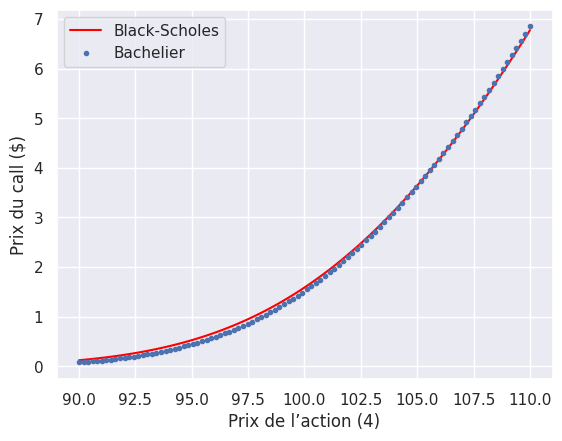

In [8]:
t = 30 / 365    # Temps jusqu'à l'expiration
sigma = 0.30    # Volatilité implicite de Black-Scholes
K = 105         # Prix d'exercice
r = 0.01        # Taux sans risque

S = np.linspace(90, 110, 100)    # Laissons notre prix de l'action varier entre 90$ et 110$

# Calculons les prix des options selon les deux modèles
C_bs, d1, d2 = call_price(sigma, S, K, r, t)
C_ba = bachelier(sigma * S, S, K, r, t)

# Visualiton les résultats
plt.plot(S, C_bs, 'k', label='Black-Scholes', color='red')
plt.plot(S, C_ba, 'b.', label='Bachelier')
plt.grid(True)
plt.legend()
plt.xlabel('Prix de l’action (4)')
plt.ylabel('Prix du call ($)')

Calculons $\Delta$ pour le modèle de Bachelier en utilisant une technique de différence finie pour prendre la dérivée. Faisons cela pour un call à la monnaie avec un prix d'exercice de \(105\). Nous conserverons les autres paramètres tels que mentionnés ci-dessus.

Nous utiliserons,
$$\frac{dr}{dx} \approx \frac{f(x + \epsilon) + f(x)}{\epsilon}$$
comme notre approximation pour la dérivée. <br><br>
La méthode des différences finies est utilisée pour approximer la dérivée du prix de l'option par rapport au prix de l'actif sous-jacent.

In [9]:
t = 30 / 365
sigma = 0.30
K = 105
r = 0.01
S = 105

# Pour Black-Scholes, nous avons une formule pour delta : Delta = norm.cdf(d1)
C_bs, d1, d2 = call_price(sigma, S, K, r, t)
Delta_bs = norm.cdf(d1)
print('Delta BS = ', Delta_bs)

# Définissons epsilon comme un petit nombre
epsilon = 1e-6

# Calculons les prix des calls
C1_ba = bachelier(sigma * S, S, K, r, t)
C2_ba = bachelier(sigma * S, S + epsilon, K, r, t)

# Estimons Delta
Delta_ba = (C2_ba - C1_ba) / epsilon
print('Delta BA = ', Delta_ba)



Delta BS =  0.520958769045928
Delta BA =  0.5038124020195767


Voici notre code pour la méthode de Newton pour la recherche de racine.


In [10]:
def newtons_method(f, fprime, R = 0, max_iter = 1000, tol=1e-3, args = [], debug = False):
    count = 0
    epsilon = 1
    f_return = []
    fprime_return = []

    while epsilon >= tol:
        count += 1
        if count >= max_iter:
            print('Sortie sur boucle infinie.')
            return (R, count)

        old_R = R

        function_value = f(R, args = args)
        function_derivative = fprime(R, args = args)
        ind = np.where(function_derivative <= 0)
        ind = ind[0]

        R = -function_value / function_derivative + R

        if ind.size > 0:
            R[ ind ] = R[ ind ] * 0.5 + R[ ind ]

        if np.isscalar(R):
            epsilon = np.abs( (R - old_R) /old_R )
        else:
            epsilon = np.linalg.norm( R - old_R, np.Inf)

        if debug == True:
            f_return.append(function_value)
            fprime_return.append(function_derivative)

    return R, count, epsilon, function_value, function_derivative, f_return, fprime_return

Ce code définit une fonction newton_methode qui implémente la méthode de Newton pour la recherche de racines. Elle prend une fonction f et sa dérivée fprime, ainsi que d'autres paramètres optionnels, et retourne la racine trouvée après un certain nombre d'itérations. La méthode de Newton utilise des approximations linéaires pour trouver les zéros d'une fonction.

Définissons notre fonction objectif pour le modèle Bachelier et calculons vega en utilisant la même technique de différenciation que celle utilisée ci-dessus.

In [11]:
def call_ba_objective_function(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]
    price = args[4]

    return bachelier(sigma, S, K, r, t) - price

def calculate_vega_ba(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]

    epsilon = 1e-6
    C1 = bachelier(sigma, S, K, r, t)
    C2 = bachelier(sigma + epsilon, S, K, r, t)

    return (C2 - C1) / epsilon


Nous verrons si nous pouvons reproduire la volatilité utilisée ci-dessus. Dans ce cas, le prix du call était en $

In [12]:
C0 = 3.6445730260768543
S = 105
K = 105
r = 0.01
t = 30/365

args = (S, K, r, t, C0)

R, count, epsilon, function_value, function_derivative, f_return, fprime_return = newtons_method(call_ba_objective_function, calculate_vega_ba, 0.5, args = args)

/tmp/ipykernel_7798/490780487.py:17: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  ind = np.where(function_derivative <= 0)


In [13]:
print(R / S)

0.3000000000000008


##  Prix ​​Bachelier d'un put

Nous avons déjà une expression et codé une fonction pour le prix d'achat.  Nous pouvons utiliser la parité put-call pour trouver le prix d'une option put

Une manière courante d'énoncer la parité put-call est,
$$C - P = S - e^{-rt}K.$$

Ainsi, si l’on connaît le prix d’un call, on peut obtenir le prix du put correspondant,
$$P = C - S + e^{-rt}K.$$



In [14]:
t = 30 / 365    # Délai jusqu'à l'expiration
sigma = 0.30    # Volatilité implicite de Black Scholes
K = 90          # Prix d'exercice
r = 0.01        # Taux sans risque
S = np.linspace(50, 110, 100)

/tmp/ipykernel_7798/261312224.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(S, P_bs, 'k', label = 'Black Scholes', color='red')


Text(0, 0.5, "Prix d'achat (Call) ($)")

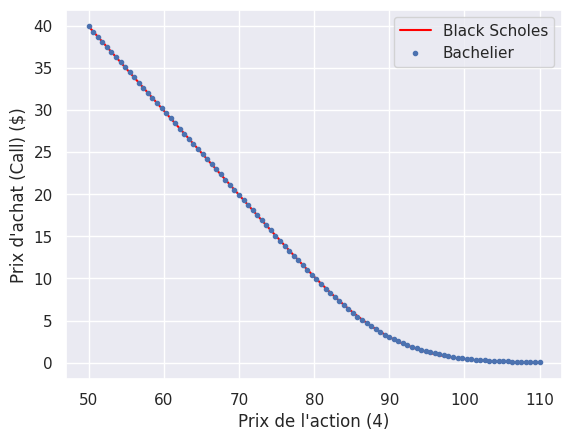

In [15]:
# Calcul du prix de vente (put) de Black Schole
P_bs = put_price(sigma, S, K, r, t)

# Calcul du prix d'achat (call) de Bachelier

C = bachelier(sigma * S, S, K, r, t)

# Utilisons la parité put-call pour calculer le prix de vente

P = C - S + np.exp(-r * t) * K


#  Visualisons les résultats
plt.plot(S, P_bs, 'k', label = 'Black Scholes', color='red')
plt.plot(S, P, 'b.', label = 'Bachelier')
plt.grid(True)
plt.legend()
plt.xlabel("Prix ​​de l'action (4)")
plt.ylabel("Prix d'achat (Call) ($)")